### Ideias
- Adicionar probabilidade de alta variação, além dos limites tradicionais
- Integração entre variáveis claramente correlacionadas
- H2 e Metano inversamente proporcionais de modo que a soma de seus valores apresente uma variação de 75-105% (tipicamente 93-98%) do total

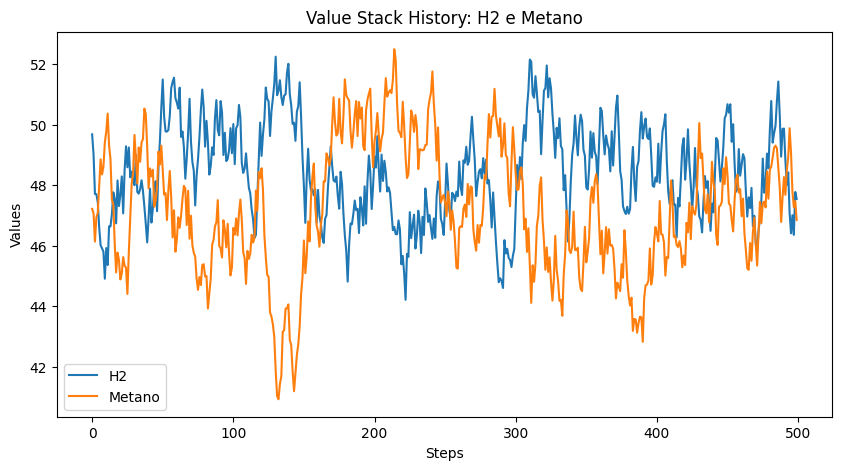

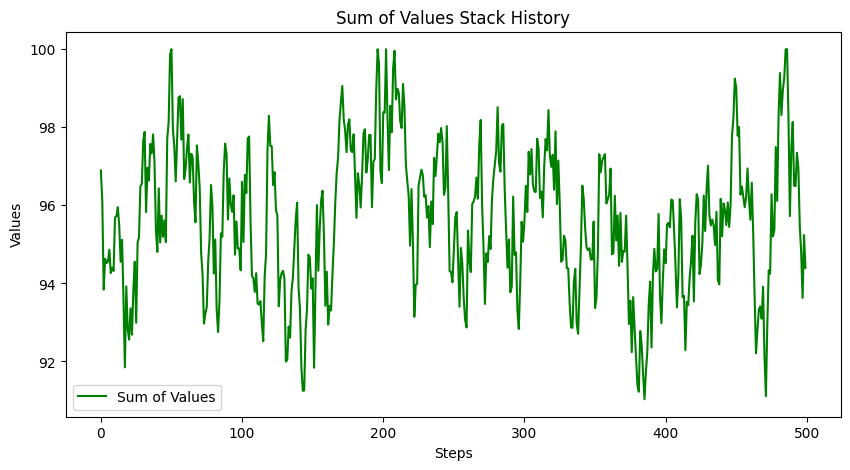

In [2]:
from TurbineSimulator import Standard, BaseOperators

H2 = Standard(lower_bound=30, upper_bound=60, typical_value=48.32, name="H2",
              theta=1.5, typical_bias=0.1)
Metano = Standard(lower_bound=39.24, upper_bound=70, typical_value=47.86, name="Metano",
                  theta=1.5, typical_bias=0.1)

Base = BaseOperators(ope1=H2, ope2=Metano, lower_extra_range=75, upper_extra_range=100,
                     lower_typical_range=93, upper_typical_range=98)

Base.simulate(500)
Base.show_history()
Base.show_sum_history()

# H2.simulate(1000)
# H2.show_history()


Node H2: Metano 
Node Metano: 



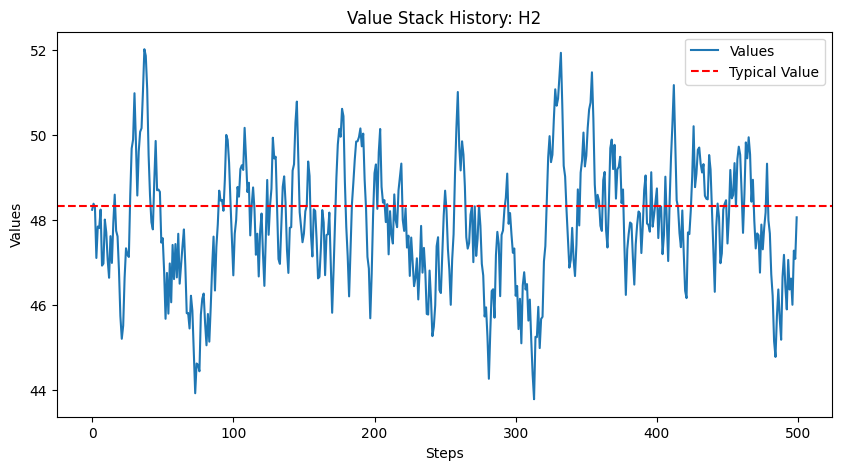

In [1]:
from TurbineSimulator import Standard, Graph, CorrelacaoH2Metano, CorrUsual

H2 = Standard(lower_bound=30, upper_bound=60, typical_value=48.32, name="H2",
              theta=1.5, typical_bias=0.1)
Metano = Standard(lower_bound=39.24, upper_bound=70, typical_value=47.86, name="Metano",
                  theta=1.5, typical_bias=0.1)

graph = Graph()
relation = CorrelacaoH2Metano(limit_lower_bound=75, limit_upper_bound=100,
                              typical_lower_bound=93, typical_upper_bound=98)

node1 = graph.add_node(H2)
node2 = graph.add_node(Metano)
graph.add_edge(node1, node2, relation)

graph.display()
print()
graph.simulate(500)
node1.op.show_history()

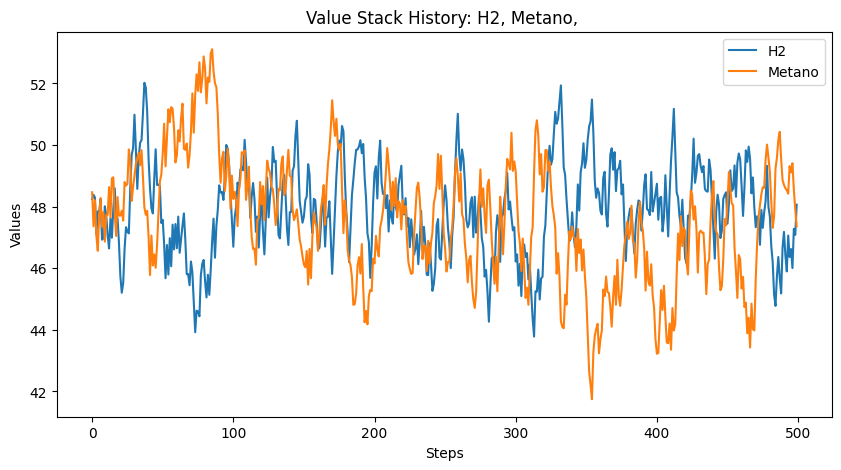

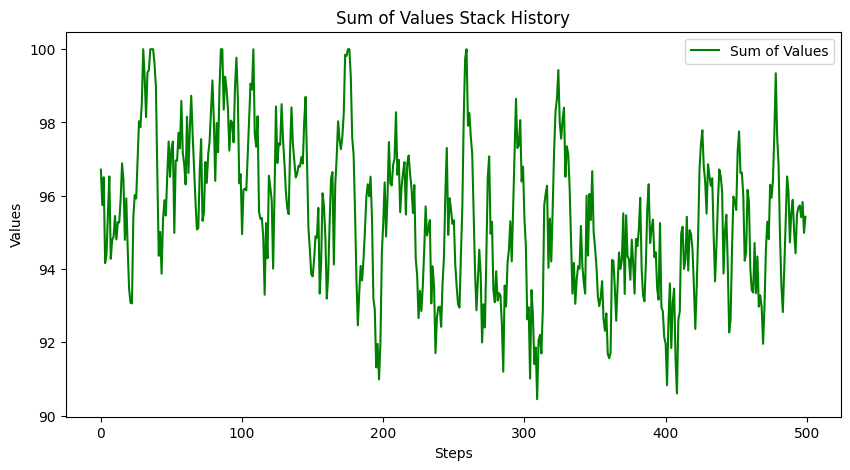

In [4]:
from TurbineSimulator import show_history, show_sum_history

show_history(nodes=[node1, node2])
show_sum_history(node1, node2)